# Analisis Mercado Inmobiliario / Proyecto Grupal

La ley de oferta y demanda es un principio económico fundamental que explica cómo cambian los precios cuando cambia la oferta de bienes y servicios o la demanda de los mismos
La relación entre la oferta y la demanda es indirecta, lo que significa que cuando:
**la oferta aumenta, los precios disminuyen y la demanda aumenta**

Por el contrario, **cuando la oferta disminuye, los precios aumentan y la demanda disminuye**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bajar 'House market data' desde Redfin https://www.redfin.com/news/data-center/

In [2]:
import pandas as pd

df = pd.read_excel('data.xlsx')

df.head()

,Region,Week of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,National,"January 29, 2012",159098.0,-0.065036,-0.044589,273143,-0.233680,0.082202,481453,0.504222,-0.033462,2076237,0.003328,-0.175919,96,2,-7,0.956230,-0.001199,0.001817
1,NaN,"February 26, 2012",160504.0,0.008834,-0.013382,301346,0.103253,0.135783,516322,0.072424,0.048186,2098630,0.010785,-0.170155,97,0,-11,0.958026,0.001796,0.002936
2,NaN,"March 25, 2012",171239.0,0.066887,0.042374,389496,0.292518,0.066204,624593,0.209697,-0.055154,2139120,0.019293,-0.171389,93,-4,-12,0.961828,0.003802,0.005955
3,NaN,"April 29, 2012",178099.0,0.040059,0.061778,400243,0.027592,0.081135,609368,-0.024377,-0.027422,2175284,0.016906,-0.172402,81,-12,-16,0.965191,0.003363,0.007000
4,NaN,"May 27, 2012",186067.0,0.044737,0.079059,458963,0.146711,0.163053,611494,0.003489,-0.004274,2184134,0.004068,-0.177071,72,-8,-17,0.968599,0.003408,0.009667


In [27]:
# Crear columna 'date' para normalizar la columna 'Week of Period End'

In [3]:
# Convertir columna 'Week of Period End' a formato datetime
df['date'] = pd.to_datetime(df['Week of Period End'])

# Normalize the date to the beginning of the week
df['date'] = df['date'] - pd.to_timedelta(df['date'].dt.dayofweek, unit='d')

df.head()

,Region,Week of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,date
0,National,"January 29, 2012",159098.0,-0.065036,-0.044589,273143,-0.233680,0.082202,481453,0.504222,-0.033462,2076237,0.003328,-0.175919,96,2,-7,0.956230,-0.001199,0.001817,2012-01-23
1,NaN,"February 26, 2012",160504.0,0.008834,-0.013382,301346,0.103253,0.135783,516322,0.072424,0.048186,2098630,0.010785,-0.170155,97,0,-11,0.958026,0.001796,0.002936,2012-02-20
2,NaN,"March 25, 2012",171239.0,0.066887,0.042374,389496,0.292518,0.066204,624593,0.209697,-0.055154,2139120,0.019293,-0.171389,93,-4,-12,0.961828,0.003802,0.005955,2012-03-19
3,NaN,"April 29, 2012",178099.0,0.040059,0.061778,400243,0.027592,0.081135,609368,-0.024377,-0.027422,2175284,0.016906,-0.172402,81,-12,-16,0.965191,0.003363,0.007000,2012-04-23
4,NaN,"May 27, 2012",186067.0,0.044737,0.079059,458963,0.146711,0.163053,611494,0.003489,-0.004274,2184134,0.004068,-0.177071,72,-8,-17,0.968599,0.003408,0.009667,2012-05-21


## Tendecias de publicaciones por mes

En el siguiente grafico se puede visualizar un incremento en las ofertas de viviendas con un pico en el mes de Mayo
El mes con menor cantidad de nuevos listados 'new listings' es Diciembre.

**Buscar correlaciones entre el aumento de nuevas ofertas en mayo y los precios para comprobar si hay menores precios en ese periodo y por lo tanto comprobar si es conveniente invertir.** 



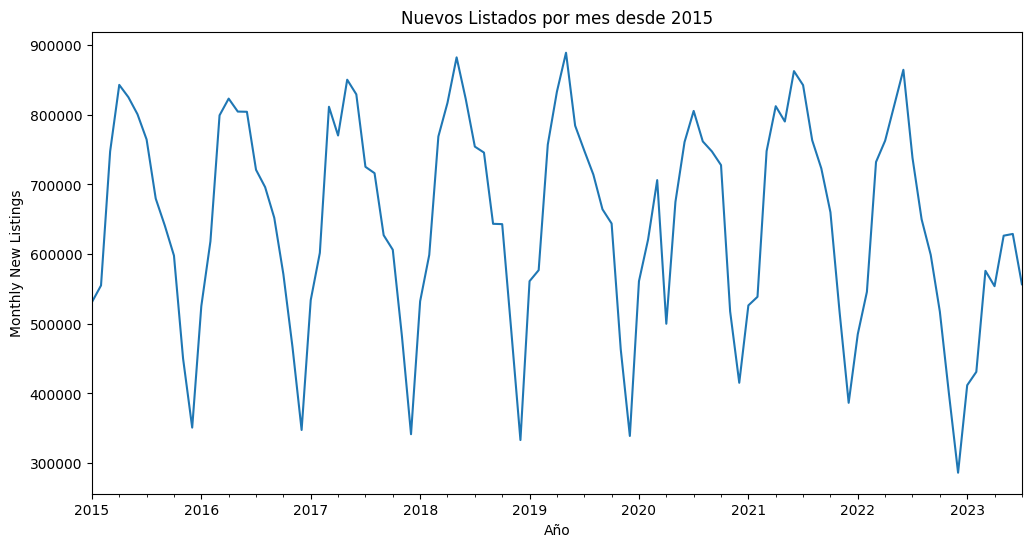

In [29]:

# Convert 'Week of Period End' to a datetime object
df['Period End'] = pd.to_datetime(df['Week of Period End'])

# Filter data for years starting from 2015
df = df[df['Period End'].dt.year >= 2015]

# Set 'Period End' as the index
df.set_index('Period End', inplace=True)

# Resample data to get monthly sums
monthly_new_listings = df['New Listings'].resample('M').sum()

# Plot the data
plt.figure(figsize=(12, 6))
monthly_new_listings.plot()
plt.xlabel('Año')
plt.ylabel('Monthly New Listings')
plt.title('Nuevos Listados por mes desde 2015')
plt.show()


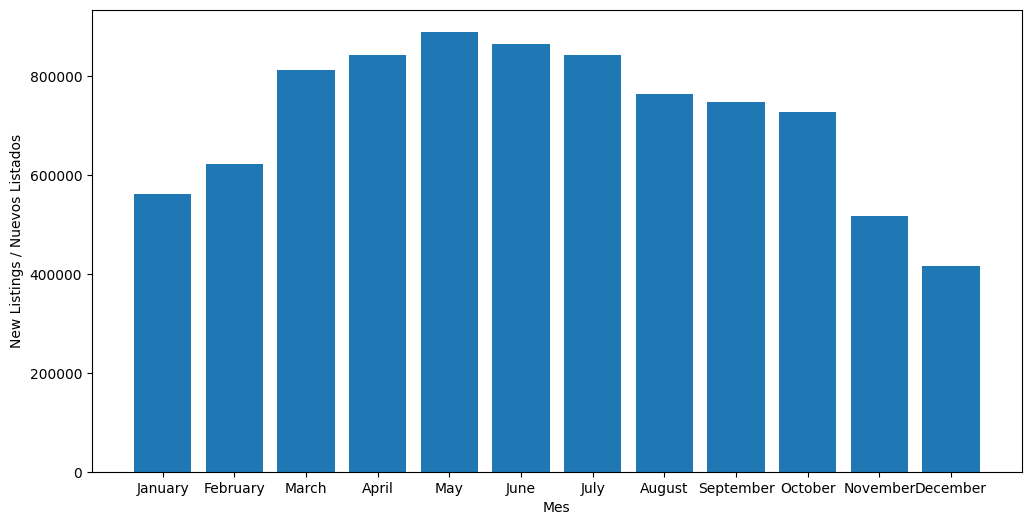

In [6]:
df['Period End'] = pd.to_datetime(df['Week of Period End'])
df.set_index('Period End', inplace=True)
monthly_new_listings = df['New Listings'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_new_listings.index.strftime('%B'), monthly_new_listings)
plt.xlabel('Mes')
plt.ylabel('New Listings / Nuevos Listados')
plt.show()


# 1. Determinar si la economia de Estados Unidos esta en recesión

> Wikipedia: Una recesión es una disminución o pérdida generalizada de la actividad económica de un país o región. Esta reducción de la actividad económica se mide a través de la bajada, en tasa interanual, del Producto Interno Bruto real o en ingles Gross Domestic Product (GDP)

Las etapas recesivas mas recientes fueron durante la emergencia Covid 2020 bajo el presidente Donald Trump, y 2008-2009 Crisis de hipotecas SubPrime.

## Como se determinan las tasas de hipotecas

Las tasas de interés hipotecarias dependen de los términos del préstamo, el tipo de préstamo, el puntaje de crédito, la relación deuda-ingresos y el historial laboral. 

Los prestamistas hipotecarios establecen las tasas de interés de forma personalizada para cada prestatario. 

Se determinan mediante una combinación de factores del mercado, teniendo en cuenta cómo se está desempeñando la economía de Estados Unidos en ese momento, y factores personales como el tipo de préstamo hipotecario y los términos que elijas, tu puntaje de crédito y la cantidad del pago inicial.

### Las tasas de interés hipotecarias son afectadas primero por factores financieros externos como la inflación y el crecimiento económico de Estados Unidos.



| Las tasas de Hipoteca tipicamente incrementan cuando: | Las tasas de Hipoteca tipicamente decrecen cuando:|
| --------------                                     | --------                            |
|El numero de viviendas en venta esta en aumento.	|El número de viviendas en venta está disminuyendo.
|La economia crece                    |La economia se desacelera
|Desempleo es bajo	                    |El Desempleo es alto
|Inflacion es alta                          |Inflacion es baja


Fuente: https://www.redfin.com/todays-mortgage-rates

## Datos a buscar: 
                
                + VMBS tasas hipoteca (mortgage rates)
                + Inflacion
                + Tasas de desempleo (UNRATE)
                + Propiedades en venta año a año

***Propuesta a resolver:*** Determinar si esta o no en recesion la economia de Estados Unidos.


## Total Viviendas vendidas por mes desde 2015-2023

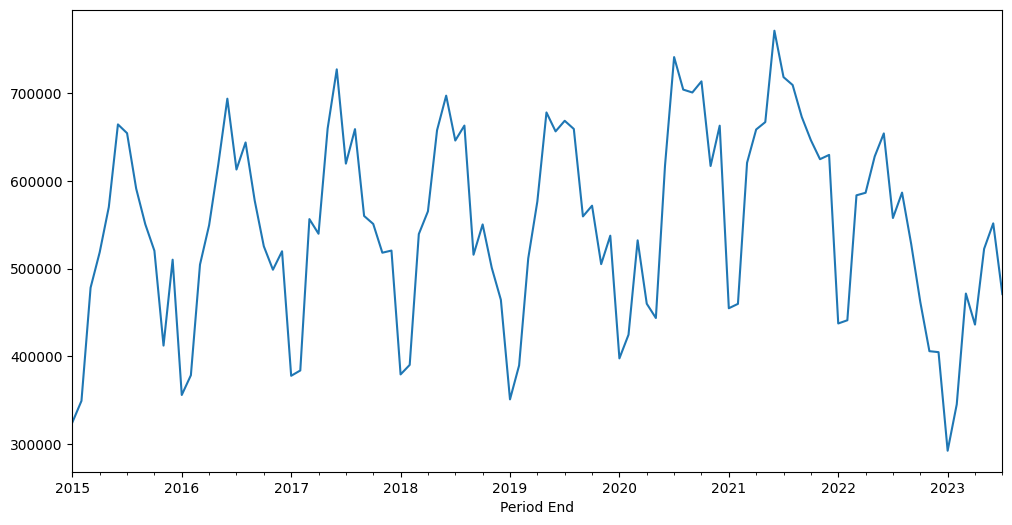

In [31]:
plt.figure(figsize=(12, 6))

df['Period End'] = pd.to_datetime(df['Week of Period End'])
df.set_index('Period End', inplace=True)

homes_sold = df['Homes Sold'].resample('M').sum()
homes_sold.plot()
plt.show()

## Observacion: Los 3 maximos desde 2021 a 2023 muestran que el total de propiedades vendidas es menor, indicando un cambio en la tendencia de los 10 años anteriores. Investigar (quizas al haber menor oferta los precios aumentan) buscar precio promedio (MedianHouse price). 

# Precio Mediano de Viviendas e Inventario

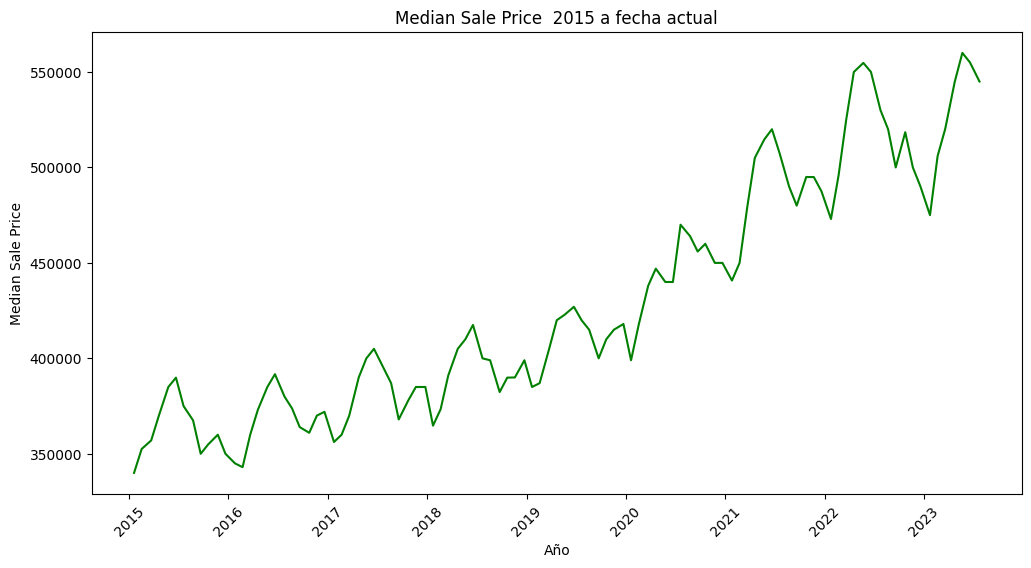

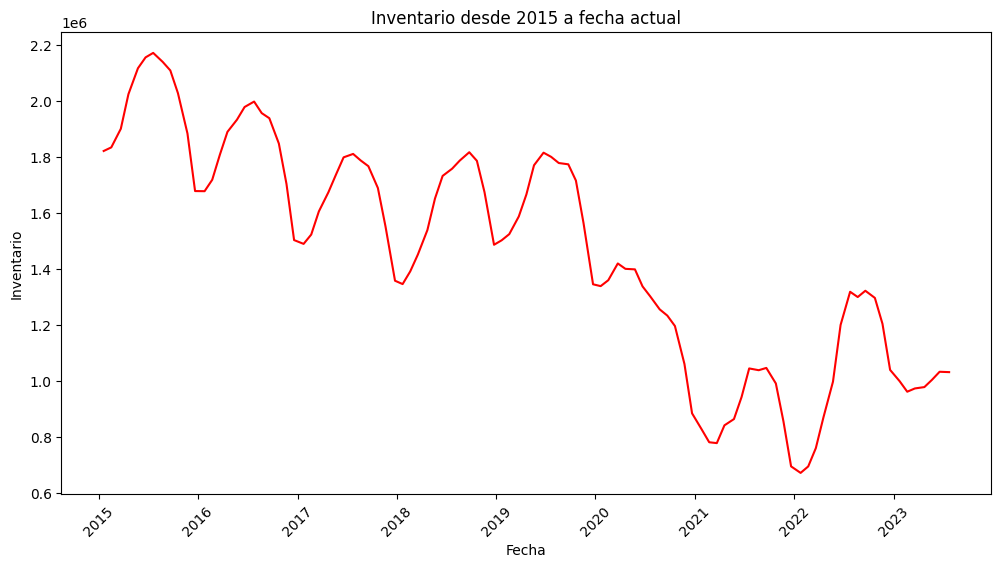

In [32]:
# Filtrar la data para el rango deseado
filtered_df = df[df['date'].dt.year >= 2015]

# Group the data by date and calculate the median sale price
median_price = filtered_df.groupby('date')['Median Sale Price'].median()

# Group the data by date and calculate the inventory
inventory = filtered_df.groupby('date')['Inventory'].sum()

# Plot the median sale price
plt.figure(figsize=(12, 6))
plt.plot(median_price.index, median_price.values, color='green')
plt.xlabel('Año')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price  2015 a fecha actual')
plt.xticks(rotation=45)
plt.show()

# Plot the inventory
plt.figure(figsize=(12, 6))
plt.plot(inventory.index, inventory.values, color='red')
plt.xlabel('Fecha')
plt.ylabel('Inventario')
plt.title('Inventario desde 2015 a fecha actual')
plt.xticks(rotation=45)
plt.show()

## Observación: Correlación inversa entre el Inventario y los Precios Medianos de Venta, lo que confirma la ley fundamental de la economía (oferta y demanda).

Cuando la oferta disminuye (inventario), los precios suben (precio mediano de venta).

Solución: En el conjunto de datos de Redfin, tenemos el inventario y el precio mediano de venta, lo que respalda la tesis. ***Cuando hay menos oferta (viviendas disponibles), los precios aumentan.***

## Indicador de Recesión SAHM

https://fred.stlouisfed.org/series/SAHMREALTIME

Frecuencia: Mensual

El Indicador de Recesión Sahm señala el comienzo de una recesión cuando el promedio móvil de tres meses de la tasa de desempleo nacional (U3) aumenta en 0.50 puntos porcentuales o más con respecto a su punto más bajo en los últimos 12 meses.

Podemos bajar .CSV desde
https://fred.stlouisfed.org/series/UNRATE

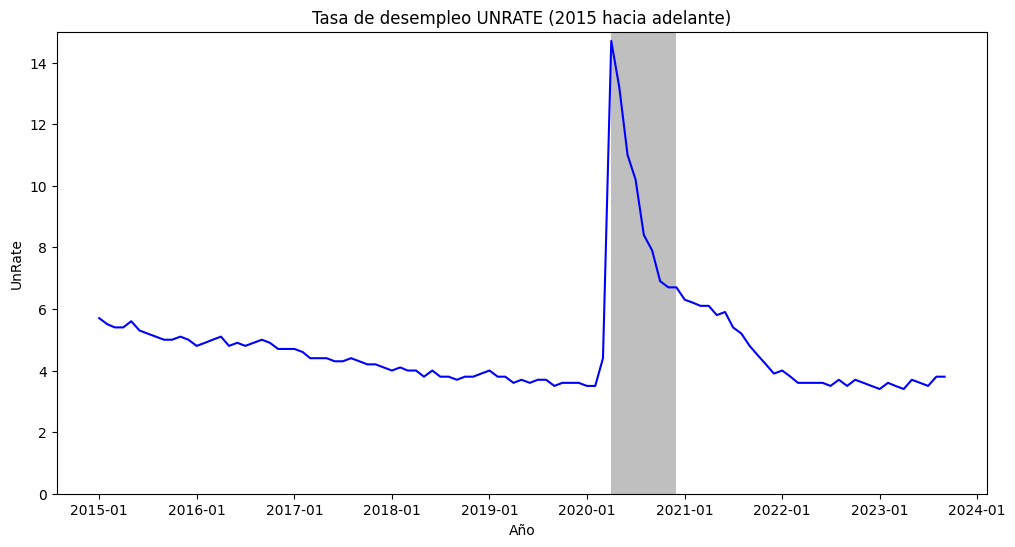

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loading the data
data = pd.read_csv('UNRATE_FRED.csv')

# Filter data for years starting from 2015
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert DATE column to datetime
data = data[data['DATE'].dt.year >= 2015]

# Plotting the data
plt.figure(figsize=(12, 6))

# Set the background color conditionally
plt.fill_between(data['DATE'], 0.00, 15.00, where=data['UNRATE'] > 6.30, facecolor='grey', alpha=0.5)
plt.plot(data['DATE'], data['UNRATE'], color='blue')

# Set the y-axis limits
plt.ylim(0.00, 15.00)

# Set the date format for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xlabel('Año')
plt.ylabel('UnRate')
plt.title('Tasa de desempleo UNRATE (2015 hacia adelante)')

plt.show()

In [14]:
data.tail(50)

,DATE,UNRATE
859,2019-08-01,3.7
860,2019-09-01,3.5
861,2019-10-01,3.6
862,2019-11-01,3.6
863,2019-12-01,3.6
864,2020-01-01,3.5
865,2020-02-01,3.5
866,2020-03-01,4.4
867,2020-04-01,14.7
868,2020-05-01,13.2


In [12]:
import pandas as pd
import plotly.express as px

# Loading the data
data = pd.read_csv('UNRATE_FRED.csv')

# Filter data for years starting from 2015
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert DATE column to datetime
data = data[data['DATE'].dt.year >= 2015]

# Calculate the three-month moving average
data['Moving_Average'] = data['UNRATE'].rolling(window=3).mean()

# Calculate the Sahm Indicator
data['Sahm_Indicator'] = (data['Moving_Average'] - data['Moving_Average'].shift(1)) >= 0.5

# Create a Plotly figure
fig = px.line(data, x='DATE', y='UNRATE', title='Unemployment Rate UNRATE with Sahm Indicator')

# Add the Sahm Indicator as a bar chart
fig.add_bar(x=data['DATE'], y=data['Sahm_Indicator'], name='Sahm Indicator')

# Set the y-axis range
fig.update_layout(yaxis_range=[0.00, 15.00])

# Add labels and title
fig.update_layout(xaxis_title='Year', yaxis_title='Unemployment Percentage')

fig.show()


## Observación:
De acuerdo al indicador SAHM aun la economia de Estados Unidos **no esta en recesión** ya que el indice de desempleo es relativamente bajo:UNRATE sept 2023 3.8

Por el momento esta lejos del maximo de Abril de 2020 **14.7** 
y Octubre de 2009 **10.0**

# Producto Bruto Interno (Gross Domestic Product)

In [3]:
# Loading the data
gdp = pd.read_csv('GDP.csv')

In [4]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    169 non-null    object 
 1   GDP     169 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [11]:
import pandas as pd
import plotly.express as px

gdp = pd.read_csv('GDP.csv')

fig = px.line(gdp, x='DATE', y='GDP', title='PBI o GDP a lo largo del tiempo para Estados Unidos')
fig.show()

## Observación: 

> La tendencia del PBI de Estados Unidos es ascendente y presenta una recuperación completa de la caida en abril 2020.

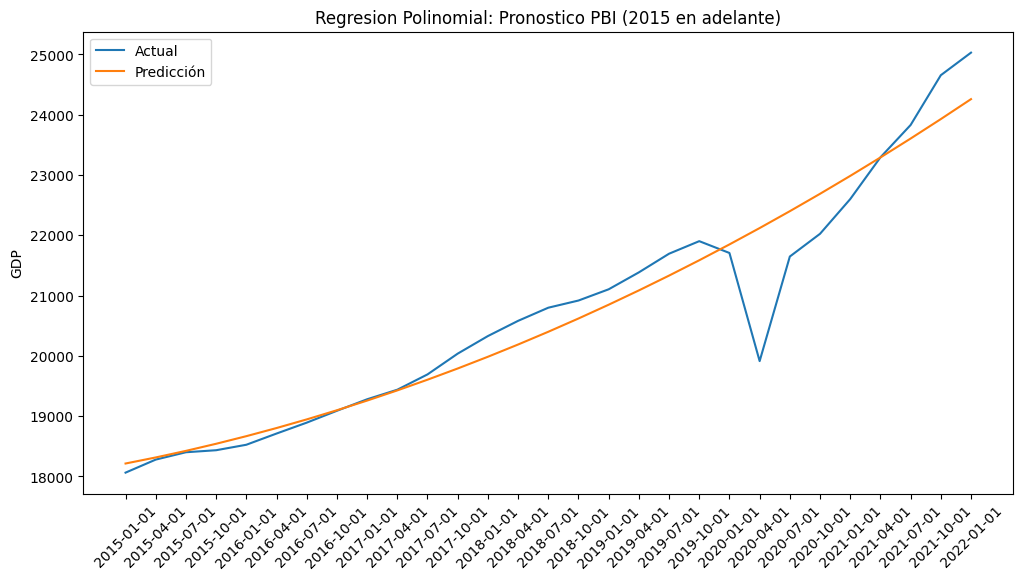

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


gdp = pd.read_csv('GDP.csv')

# Filtrar data desde el año 2015 hacia adelante
gdp = gdp[gdp['DATE'] >= '2015-01-01']

# Extracting the necessary columns
date = gdp['DATE']
gdp_values = gdp['GDP']

# Creating a polynomial regression model
degree = 2
coefficients = np.polyfit(range(len(date)), gdp_values, degree)
polynomial = np.poly1d(coefficients)

# Generating the predicted values
predicted_values = polynomial(range(len(date)))


# Plotear graficos
plt.figure(figsize=(12, 6))

plt.plot(date, gdp_values, label='Actual')
plt.plot(date, predicted_values, label='Predicción')

plt.xlabel('')
plt.ylabel('GDP')

plt.title('Regresion Polinomial: Pronostico PBI (2015 en adelante)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [4]:
gdp.tail()

,DATE,GDP
164,2021-01-01,22600.185
165,2021-04-01,23292.362
166,2021-07-01,23828.973
167,2021-10-01,24654.603
168,2022-01-01,25029.116


## Conclusion: Con los datos conseguidos logramos determinar que la economia de Estados Unidos no esta en recesion, el PBI esta en crecimiento y 'UNRATE' las tasas de desempleo son bajas. Con respecto a invertir seria conveniente esperar precios menores ya que momentaneamente los precios de las Propiedades son altos, (mayor precio promedio de los ultimos años de Estados Unidos.)